19.36,3.85,-158.17
3.85,1.20,-54.10
-158.17,-54.10,7380.35


19.5364,3.8896,-150.28
3.8896,1.2100,-52.36
-150.2800,-52.3600,7225.00


Installing package into '/Users/dittegilsfeldt/Library/R/4.4.3/library'
(as 'lib' is unspecified)

This build of rgl does not include OpenGL functions.  Use
 rglwidget() to display results, e.g. via options(rgl.printRglwidget = TRUE).

Warning message in rgl.snapshot("haydata.png", fmt = "png", top = TRUE):
"this build of rgl does not support snapshots"


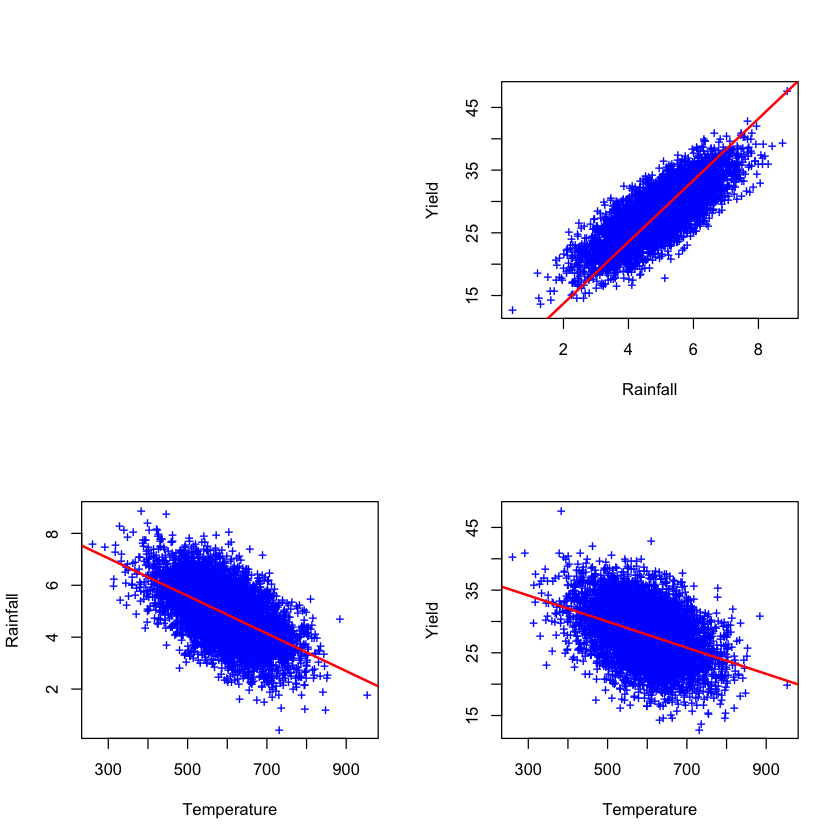

In [1]:
# Slide 3:

Hay_var <- matrix(c(4.42^2,4.42*1.1*0.8,-4.42*85*0.4,
                   4.42*1.1*0.8,1.1^2,-1.1*85*0.56,
                   -4.42*85*0.4,-1.1*85*0.56,85^2),ncol=3)
Hay_means <- c(28.02,4.91,594)

my.eigen.values<-eigen(Hay_var)$values
my.eigen.vectors<-eigen(Hay_var)$vectors

# simulate data:
k<-5000
my.x<-cbind(rnorm(k),rnorm(k),rnorm(k))

my.y<-my.x%*%diag(sqrt(my.eigen.values))%*%t(my.eigen.vectors)+
      matrix(rep(Hay_means,each=k),ncol=3)

# check variance (compare with Hay_cor)
round(var(my.y),digits=2)
Hay_var

my.y<-as.data.frame(my.y)
names(my.y)<-c("yield","rainfall","temp")
par(mfrow=c(2,2))
frame()
plot(my.y$rainfall,my.y$yield,col="blue",pch="+",xlab="Rainfall",ylab="Yield")
temp<-matrix(nrow=2,ncol=101)
for(i in 0:101){
  temp[,i]<-Hay_means[1:2]+(i-51)*eigen(Hay_var[1:2,1:2])$vectors[,1]
  }
lines(temp[2,],temp[1,],type="l", col="red",lwd=2)
plot(my.y$temp,my.y$rainfall,col="blue",pch="+",xlab="Temperature",ylab="Rainfall")
temp<-matrix(nrow=2,ncol=101)
for(i in 0:101){
  temp[,i]<-Hay_means[2:3]+50*(i-51)*eigen(Hay_var[2:3,2:3])$vectors[,1]
  }
lines(temp[2,],temp[1,],type="l", col="red",lwd=2)
plot(my.y$temp,my.y$yield,col="blue",pch="+",xlab="Temperature",ylab="Yield")
temp<-matrix(nrow=2,ncol=101)
for(i in 0:101){
  temp[,i]<-Hay_means[c(1,3)]+50*(i-51)*eigen(Hay_var[c(1,3),c(1,3)])$vectors[,1]
  }
lines(temp[2,],temp[1,],type="l", col="red",lwd=2)
par(mfrow=c(1,1))

# 3d plot:
install.packages("rgl")
options(rgl.useNULL = TRUE)
Sys.setenv(RGL_USE_NULL = "true")
library(rgl)
plot3d(my.y, type = "s", size = 0.75, lit = FALSE,col="blue",pch="+")
rgl.snapshot("haydata.png", fmt = "png", top = TRUE )

,yield.given.rainfall,temp.given.rainfall
yield.given.rainfall,1.000000000,-0.004875676
temp.given.rainfall,-0.004875676,1.000000000


[1] 0.09656091

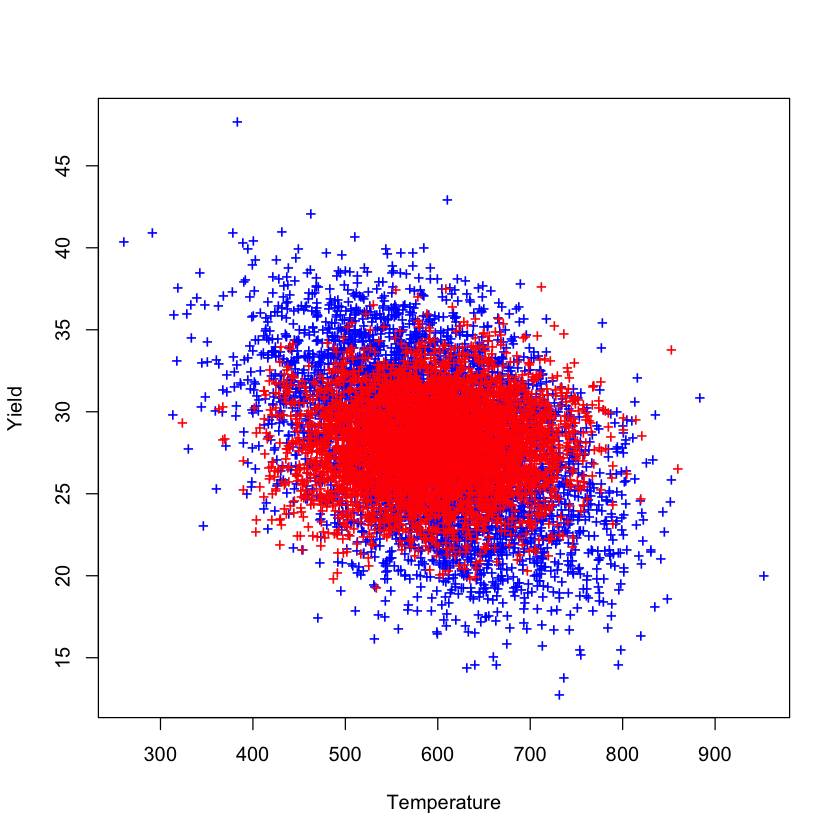

In [2]:
# Slide 4:
# sampling from the conditional distribution,
# given rainfall at its mean:
yield.given.rainfall<-Hay_means[1]+
        sqrt(Hay_var[1,1]-Hay_var[1,2]^2/Hay_var[2,2])*rnorm(k)

temp.given.rainfall<-Hay_means[3]+
        sqrt(Hay_var[3,3]-Hay_var[3,2]^2/Hay_var[2,2])*rnorm(k)


plot(my.y$temp,my.y$yield,col="blue",pch="+",xlab="Temperature",ylab="Yield")
points(temp.given.rainfall,yield.given.rainfall,col="red",pch="+")

cov2cor(var(cbind(yield.given.rainfall,temp.given.rainfall)))

# theoretical correlation:

my.partial.var<-Hay_var[c(1,3),c(1,3)]-
  Hay_var[c(1,3),2]%*%solve(Hay_var[2,2])%*%Hay_var[2,c(1,3)]

cov2cor(my.partial.var)[1,2]

# 0.09656091

In [3]:
# Slide 7:

n <- length(Fit$Oxygen)
p <-2 
shape <- var(Fit) 
center <- sapply(Fit,mean,1)

conf95 <- 
  sqrt(p * (n-1) * qf(0.95, p, n-p)/(n*(n-p))) 
pred95 <- sqrt(n+1)*rconf95 

library(car)
pred.elip95 <- 
car::ellipse(center, shape, pred95,draw = FALSE) 
conf.elip95 <- 
car::ellipse(center, shape, conf95,draw = FALSE) 

plot(pred.elip95, type='l', col = 2,lwd=2,xlab="Oxygen",ylab="Runtime") 
lines(conf.elip95, type='l', col = 3,lwd=2) 
points(Fit$Oxygen, Fit$Runtime,col=2) 
points(center[1],center[2],cex=2,pch=19,col=3) 

ERROR: Error: objekt 'Fit' blev ikke fundet


[1] 0.8090408

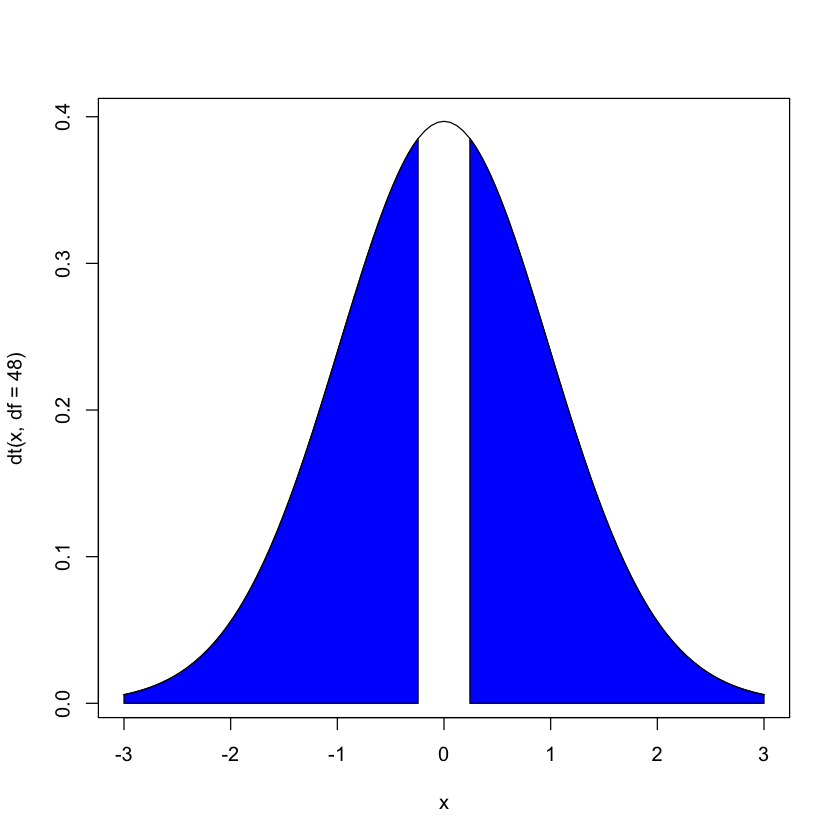

In [4]:
# Slide 14:

2*pt(-0.243,df=48)

# p=0.81

curve(dt(x,df=48),-3,3)
polygon(c(-(3000:243)/1000,-243/1000,-3,-3),
        c(dt(-(3000:243)/1000,df=48),0,0,dt(-3,df=48)),
        col="blue")
polygon(c((3000:243)/1000,243/1000,3,3),
        c(dt((3000:243)/1000,df=48),0,0,dt(3,df=48)),
        col="blue")

[1] 0.05647342

[1] 1.436485

[1] 0.2477989

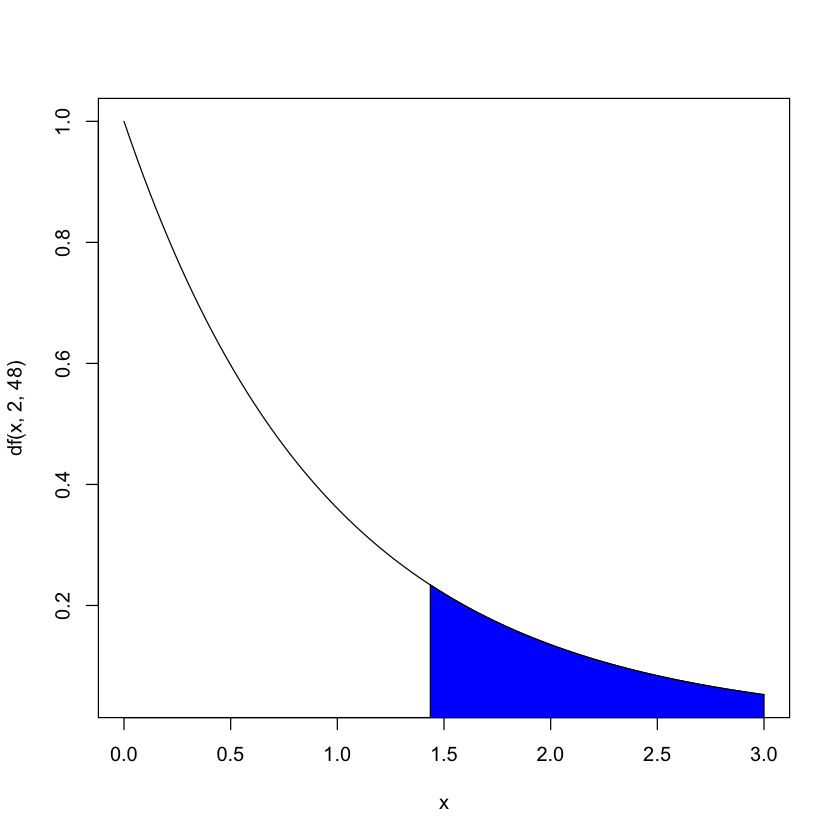

In [5]:
# Slide 18-19:

R2<-1-det(matrix(c(1,0.158,0.12,0.158,1,-0.309,0.12,-0.309,1),nrow=3))/
      det(matrix(c(1,-0.309,-0.309,1),nrow=2))
R2

(R2/(1-R2))*48/2

# 1.436


1-pf((R2/(1-R2))*48/2,2,48)

#p=0.25

curve(df(x,2,48),0,3)
polygon(c((3000:1436)/1000,1436/1000,3,3),
        c(df((3000:1436)/1000,2,48),0,0,df(3,2,48)),
        col="blue")

In [6]:
# Slide 21:
# reading in data:
load("../Data/Winedata.Rdata")

# two objects: wines, with characteristics, and vintages the wine type.
ls()

[1] "Hay_means"            "Hay_var"              "R2"                  
 [4] "i"                    "k"                    "my.eigen.values"     
 [7] "my.eigen.vectors"     "my.partial.var"       "my.x"                
[10] "my.y"                 "temp"                 "temp.given.rainfall" 
[13] "user_lib"             "vintages"             "wines"               
[16] "yield.given.rainfall"

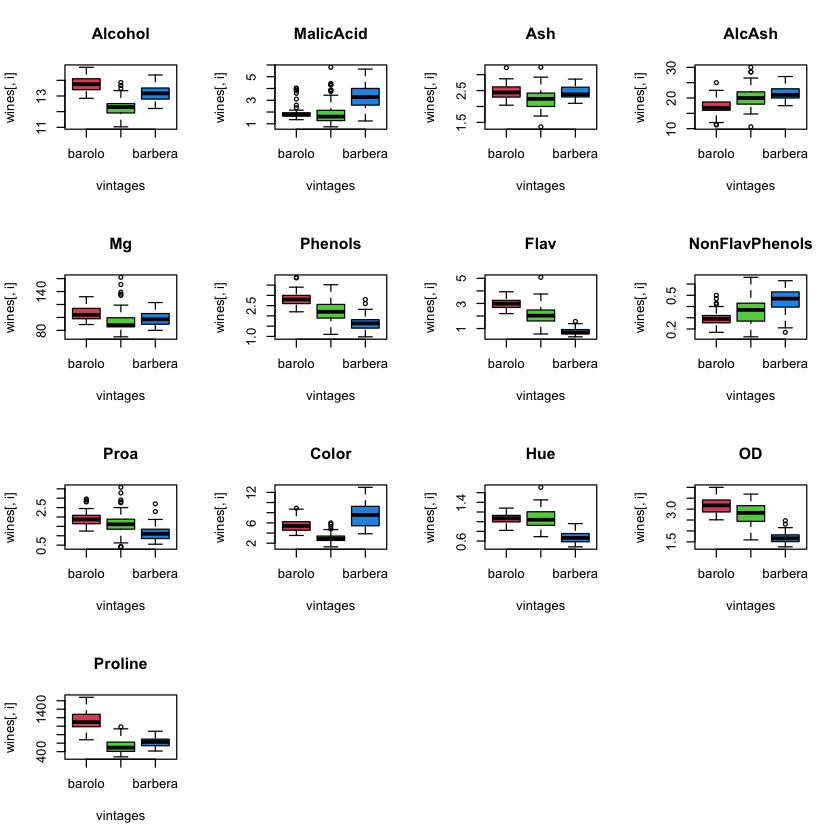

In [7]:
#Slide 22:
par(mfrow = c(4,4))
for (i in 1:13) boxplot(wines[,i] ~ vintages, col = 2:4, 
                        main=paste(names(wines)[i]))
par(mfrow = c(1,1))

Indlaeser kraevet pakke: carData

Warning message:
"pakke 'carData' blev bygget under R version 4.5.1"


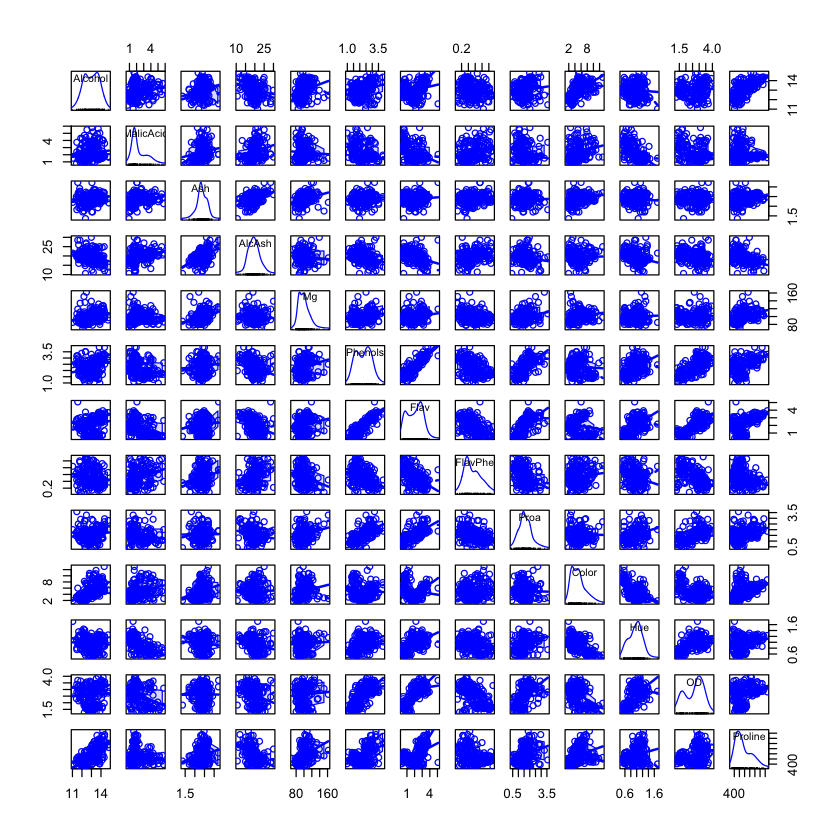

In [8]:
# Slide 23:

library(car)
scatterplotMatrix(wines)

In [9]:
#slide 25:
# looking at variation:
round(var(wines),digits=2)

,Alcohol,MalicAcid,Ash,AlcAsh,Mg,Phenols,Flav,NonFlavPhenols,Proa,Color,Hue,OD,Proline
Alcohol,0.66,0.09,0.05,-0.84,3.14,0.15,0.19,-0.02,0.06,1.03,-0.01,0.04,164.57
MalicAcid,0.09,1.25,0.05,1.08,-0.87,-0.23,-0.46,0.04,-0.14,0.64,-0.14,-0.29,-67.55
Ash,0.05,0.05,0.08,0.41,1.12,0.02,0.03,0.01,0.00,0.16,0.00,0.00,19.32
AlcAsh,-0.84,1.08,0.41,11.15,-3.97,-0.67,-1.17,0.15,-0.38,0.15,-0.21,-0.66,-463.36
Mg,3.14,-0.87,1.12,-3.97,203.99,1.92,2.79,-0.46,1.93,6.62,0.18,0.67,1769.16
Phenols,0.15,-0.23,0.02,-0.67,1.92,0.39,0.54,-0.04,0.22,-0.08,0.06,0.31,98.17
Flav,0.19,-0.46,0.03,-1.17,2.79,0.54,1.00,-0.07,0.37,-0.40,0.12,0.56,155.45
NonFlavPhenols,-0.02,0.04,0.01,0.15,-0.46,-0.04,-0.07,0.02,-0.03,0.04,-0.01,-0.04,-12.20
Proa,0.06,-0.14,0.00,-0.38,1.93,0.22,0.37,-0.03,0.33,-0.03,0.04,0.21,59.55
Color,1.03,0.64,0.16,0.15,6.62,-0.08,-0.40,0.04,-0.03,5.37,-0.28,-0.71,230.77


In [10]:
# Slide 26:
round(var(scale(wines)),digits=2)

,Alcohol,MalicAcid,Ash,AlcAsh,Mg,Phenols,Flav,NonFlavPhenols,Proa,Color,Hue,OD,Proline
Alcohol,1.00,0.09,0.21,-0.31,0.27,0.29,0.24,-0.16,0.14,0.55,-0.07,0.07,0.64
MalicAcid,0.09,1.00,0.16,0.29,-0.05,-0.34,-0.41,0.29,-0.22,0.25,-0.56,-0.37,-0.19
Ash,0.21,0.16,1.00,0.44,0.29,0.13,0.12,0.19,0.01,0.26,-0.07,0.00,0.22
AlcAsh,-0.31,0.29,0.44,1.00,-0.08,-0.32,-0.35,0.36,-0.20,0.02,-0.27,-0.28,-0.44
Mg,0.27,-0.05,0.29,-0.08,1.00,0.21,0.20,-0.26,0.24,0.20,0.06,0.07,0.39
Phenols,0.29,-0.34,0.13,-0.32,0.21,1.00,0.86,-0.45,0.61,-0.06,0.43,0.70,0.50
Flav,0.24,-0.41,0.12,-0.35,0.20,0.86,1.00,-0.54,0.65,-0.17,0.54,0.79,0.49
NonFlavPhenols,-0.16,0.29,0.19,0.36,-0.26,-0.45,-0.54,1.00,-0.37,0.14,-0.26,-0.50,-0.31
Proa,0.14,-0.22,0.01,-0.20,0.24,0.61,0.65,-0.37,1.00,-0.03,0.30,0.52,0.33
Color,0.55,0.25,0.26,0.02,0.20,-0.06,-0.17,0.14,-0.03,1.00,-0.52,-0.43,0.32


In [11]:
# Slide 27:
Sigma<-var(scale(wines))

sum(diag(Sigma))

[1] 13

In [12]:
# Slide 29:
T<-eigen(Sigma)$vectors

# The inverse of T is equal to the matrix transpose t(T):

Lambda<-t(T)%*%Sigma%*%T

round(Lambda, digits=2)


4.71,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
0.00,2.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
0.00,0.0,1.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
0.00,0.0,0.00,0.92,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
0.00,0.0,0.00,0.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
0.00,0.0,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.0
0.00,0.0,0.00,0.00,0.00,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.0
0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35,0.00,0.00,0.00,0.00,0.0
0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.00,0.00,0.00,0.0
0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.0
0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.00,0.0


In [13]:
# Slide 30:

T[,1]

[1] -0.144329395  0.245187580  0.002051061  0.239320405 -0.141992042
 [6] -0.394660845 -0.422934297  0.298533103 -0.313429488  0.088616705
[11] -0.296714564 -0.376167411 -0.286752227

In [14]:
# Slide 31:

round(T[,1],digits=2)

[1] -0.14  0.25  0.00  0.24 -0.14 -0.39 -0.42  0.30 -0.31  0.09 -0.30 -0.38
[13] -0.29

In [15]:
# Slide 32:
round(T[,1]*sqrt(diag(var(wines))),digits=2)

Alcohol      MalicAcid            Ash         AlcAsh             Mg 
         -0.12           0.27           0.00           0.80          -2.03 
       Phenols           Flav NonFlavPhenols           Proa          Color 
         -0.25          -0.42           0.04          -0.18           0.21 
           Hue             OD        Proline 
         -0.07          -0.27         -90.30

In [16]:
# Slide 17:

sum(diag(Lambda))

[1] 13

Eigenvectors,Variance.Explained
<int>,<dbl>
1,36
2,55
3,67
4,74
5,80
6,85
7,89
8,92
9,94


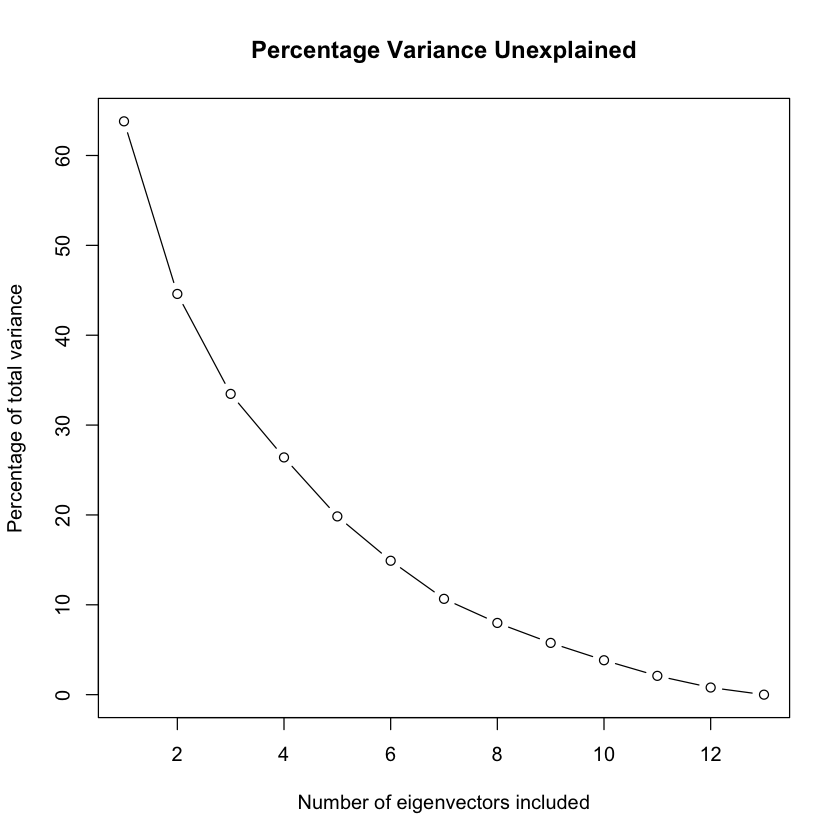

In [17]:
# Slide 18:


plot(100*(13-cumsum(diag(Lambda)))/13,type="b",main="Percentage Variance Unexplained",
      xlab='Number of eigenvectors included',
      ylab='Percentage of total variance')

data.frame("Eigenvectors"=1:13,"Variance Explained"=round(100*(cumsum(diag(Lambda)))/13))


In [18]:
# Slide 44:
install.packages("remotes")
library(remotes)
install_github("rwehrens/ChemometricsWithR")

install.packages("ChemometricsWithR")
library(ChemometricsWithR)
wines.PC<- PCA(scale(wines))
names(wines.PC)
summary(wines.PC)

Installing package into '/Users/dittegilsfeldt/Library/R/4.4.3/library'
(as 'lib' is unspecified)

Using GitHub PAT from the git credential store.




kohonen (NA -> 3.0.12) [CRAN]


Installing 1 packages: kohonen

Installing package into '/Users/dittegilsfeldt/Library/R/4.4.3/library'
(as 'lib' is unspecified)

Warning message in i.p(...):
"installation of package 'kohonen' had non-zero exit status"


: 

In [1]:
# Slide 45:

head(wines.PC$loadings,n=3)
head(T,n=3)

ERROR: Error: objekt 'wines.PC' blev ikke fundet


In [ ]:
# Slide 46:

head(wines.PC$scores,n=3)
head(scale(wines)%*%T,n=3)

In [ ]:
# Slide 47:

wines.PC$var
wines.PC$totalvar
wines.PC$centered.data

In [ ]:
# Slide 48:

plot(1:13,wines.PC$var,xlab="PC",ylab="var")

In [ ]:
# Slide 49:

scoreplot(wines.PC, col = vintages, pch= as.numeric(vintages), lwd=2)
legend("topright",levels(vintages), col=1:3,pch=1:3)

In [ ]:
# Slide 50:

loadingplot(wines.PC, show.names= TRUE)

In [ ]:
# Slide 51:

par(mfrow=c(1,2))
loadingplot(wines.PC, pc=c(1,3), show.names= TRUE)
loadingplot(wines.PC, pc=c(2,3), show.names= TRUE)
par(mfrow=c(1,1))

In [ ]:
# Slide 52:

biplot(wines.PC, score.col = vintages, show.names = "loadings")
legend("topright",levels(vintages), col=1:3,pch=1:3)

In [ ]:
# Slide 54:
install.packages("chemometrics")
library(chemometrics)
wines.PCA<- princomp(wines, cor = TRUE)
res<-pcaDiagplot(wines, wines.PCA, a=3)

In [ ]:
# Slide 55:

par(mfrow=c(1,1))
plot(res$SDist, res$ODist, type="n")
text(res$SDist, res$ODist, labels=as.character(1:178))

In [ ]:
# Slide 57:

install.packages("png")
library(png)


pigs<-readPNG("Data/Picture2.png")

ncol(pigs)
## [1] 719
	
nrow(pigs)
## [1] 719

#719*719 pixels - 719*719*4=2067844 numbers

In [ ]:
# array with 4 layers
str(pigs)


number1<-pigs[,,1]
number2<-pigs[,,2]
number3<-pigs[,,3]
number4<-pigs[,,4]

pigs.number1.pca <-  prcomp(number1, center = FALSE)
pigs.number2.pca <-  prcomp(number2, center = FALSE)
pigs.number3.pca <-  prcomp(number3, center = FALSE)
pigs.number4.pca <-  prcomp(number4, center = FALSE)

In [ ]:
# Gather PCA object sin one list:
	
full.pca <- list(pigs.number1.pca,pigs.number2.pca,
                 pigs.number3.pca,pigs.number4.pca)



index<-c(3,6,9,12,15,18,50,100)
# function for reconstruction from pc (scores):

my.reconstruct<-function(j) {
    return(j$x[,1:i] %*% t(j$rotation[,1:i]))
  }
# reconstructs and writes to disc:

for (i in index) {
  pca.picture <- sapply(full.pca,my.reconstruct,simplify = 'array')
  writePNG(pca.picture, 
    paste("picture/pigs_compressed_", i, "_components.jpg", sep =""))
  }

In [ ]:
# Slide 60:

read.csv2("Data/BoxData.csv")

library(car)
scatterplotMatrix(BoxData,regLine=F,smooth=F,
  ellipse=list(levels=0.9, robust=TRUE, fill=F),
  diagonal=list(method="histogram", breaks="FD"))
install.packages("GGally")
library(GGally)
ggpairs(BoxData)

In [ ]:
#Slide 61:

install.packages("rgl")
library(rgl)

plot3d( 
  x=BoxData$longax, y=BoxData$intermax, z=BoxData$longdia, 
  col = 2:4, 
  type = 's', 
  radius = .1,
  xlab="longax", ylab="intermax", zlab="longdia")


In [ ]:
# Slide 62:

round(var(BoxData),digits=2)
round(cor(BoxData),digits=2)

In [ ]:
# Slide 63:

eigen(var(BoxData))$values
eigen(var(BoxData))$values/sum(eigen(var(BoxData))$values)
cumsum(eigen(var(BoxData))$values/sum(eigen(var(BoxData))$values))
eigen(var(BoxData))$vectors

In [ ]:
# Slide 64:

par(mfrow=c(1,2))
plot(1:7,eigen(var(BoxData))$values,type="b",xlab="Principal Components",
     ylab="Variance",main="Scree plot")

plot(1:7,cumsum(eigen(var(BoxData))$values)/
         sum(eigen(var(BoxData))$values),type="b",xlab="Principal Components",
     ylab="Variance explained",main="Cumulative relative variance")

In [ ]:
# Slide 65:

cor(BoxData,as.matrix(BoxData)%*%eigen(var(BoxData))$vectors)

PCA(BoxData)


cor(BoxData,eigen(var(BoxData))$vectors)

cor(BoxData,as.matrix(BoxData)%*%eigen(var(BoxData))$vectors)

In [ ]:
# Slide 70:

cbind(eigen(cor(BoxData))$values,
eigen(cor(BoxData))$values/7,
cumsum(eigen(cor(BoxData))$values/7))


lambdastar<-mean(eigen(cor(BoxData))$values[6:7])

-dim(BoxData)[1]*log( prod(eigen(cor(BoxData))$values[6:7])/(lambdastar^2))

# 33.13

1-pchisq(33.14,df=2)

# p=0.0000006